In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = {
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Revenue": [2583, 3305, 2594, 4498, 10267],
    "EBITDA": [257.55, 658.69, 336.82, 727.51, 1466.04]
}
df = pd.DataFrame(data)


In [39]:
# Calculate growth rates
df["Revenue Growth (%)"] = df["Revenue"].pct_change() * 100
df["EBITDA Growth (%)"] = df["EBITDA"].pct_change() * 100

In [40]:
# Predict revenue and EBITDA for the next 2 years using CAGR
def calculate_cagr(start_value, end_value, years):
    return ((end_value / start_value) ** (1 / years) - 1) * 100

revenue_cagr = calculate_cagr(df["Revenue"].iloc[0], df["Revenue"].iloc[-1], len(df) - 1)
ebitda_cagr = calculate_cagr(df["EBITDA"].iloc[0], df["EBITDA"].iloc[-1], len(df) - 1)

future_years = [2024, 2025]
predicted_revenue = [df["Revenue"].iloc[-1] * (1 + revenue_cagr / 100) ** i for i in range(1, 3)]
predicted_ebitda = [df["EBITDA"].iloc[-1] * (1 + ebitda_cagr / 100) ** i for i in range(1, 3)]


In [41]:
# Add predictions to the DataFrame
predicted_data = pd.DataFrame({
    "Year": future_years,
    "Revenue": predicted_revenue,
    "EBITDA": predicted_ebitda
})
df = pd.concat([df, predicted_data], ignore_index=True)

In [42]:
# Price prediction based on EBITDA growth and valuation multiples
# Assumption: Current EBITDA multiple is ~20x (adjustable)
current_price = 7118.30
current_ebitda = df["EBITDA"].iloc[4]
pe_multiple = current_price / current_ebitda

def predict_price(ebitda, pe_multiple):
    return ebitda * pe_multiple
predicted_prices = [predict_price(e, pe_multiple) for e in predicted_ebitda]

In [43]:
# Display Results
print("Predicted Data:")
print(predicted_data)

Predicted Data:
   Year       Revenue       EBITDA
0  2024  14496.840177  2264.471642
1  2025  20469.307015  3497.743456


In [44]:
# Buy and Sell Recommendations
buy_price = 6950
sell_price = 8600

def suggest_action(price):
    if price <= buy_price:
        return "BUY"
    elif price >= sell_price:
        return "SELL"
    else:
        return "HOLD"

predicted_data["Predicted Price"] = predicted_prices
predicted_data["Action"] = predicted_data["Predicted Price"].apply(suggest_action)

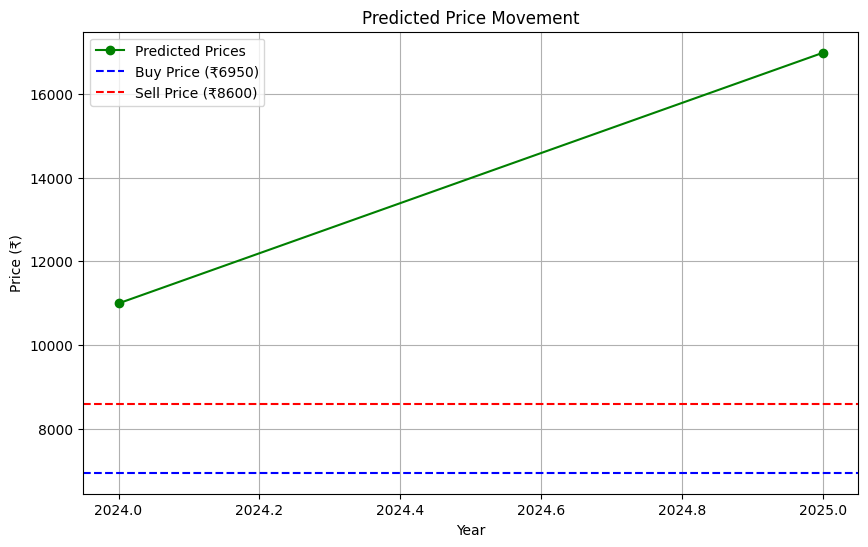

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(future_years, predicted_prices, label="Predicted Prices", marker="o", color="green")
plt.axhline(buy_price, color="blue", linestyle="--", label="Buy Price (₹6950)")
plt.axhline(sell_price, color="red", linestyle="--", label="Sell Price (₹8600)")
plt.title("Predicted Price Movement")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid()
plt.show()

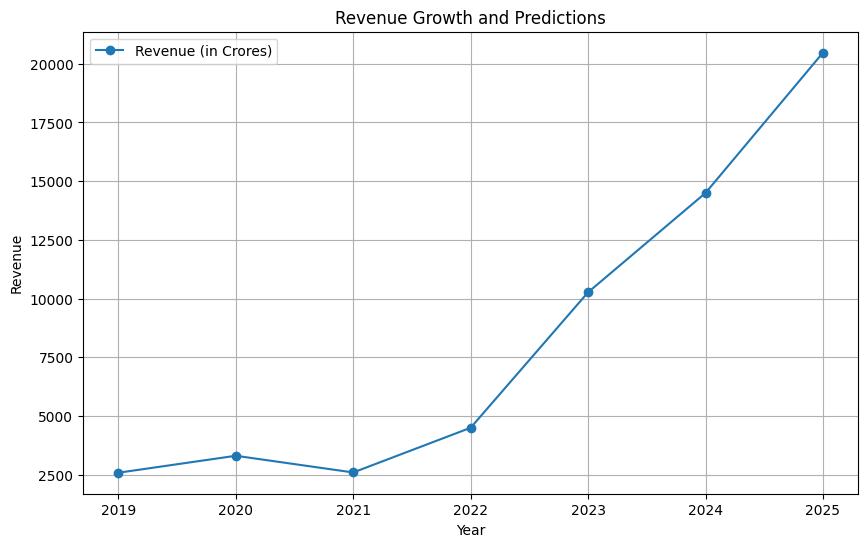

In [46]:
# Plotting revenue and price trends
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Revenue"], label="Revenue (in Crores)", marker="o")
plt.title("Revenue Growth and Predictions")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend()
plt.grid()
plt.show()

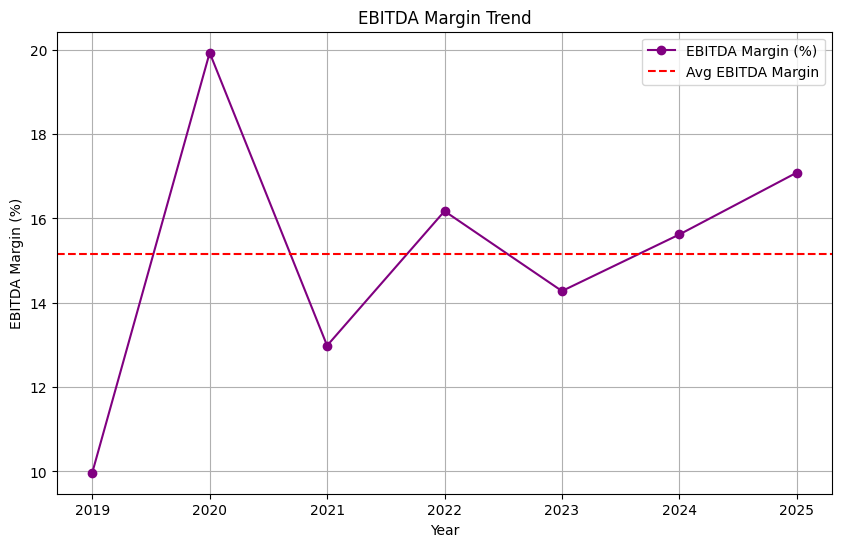

In [47]:
# Calculate EBITDA Margin
df["EBITDA Margin (%)"] = (df["EBITDA"] / df["Revenue"]) * 100

# Graph 1: EBITDA Margin Trend
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["EBITDA Margin (%)"], label="EBITDA Margin (%)", marker="o", color="purple")
plt.title("EBITDA Margin Trend")
plt.xlabel("Year")
plt.ylabel("EBITDA Margin (%)")
plt.axhline(y=df["EBITDA Margin (%)"].mean(), color="red", linestyle="--", label="Avg EBITDA Margin")
plt.legend()
plt.grid()
plt.show()


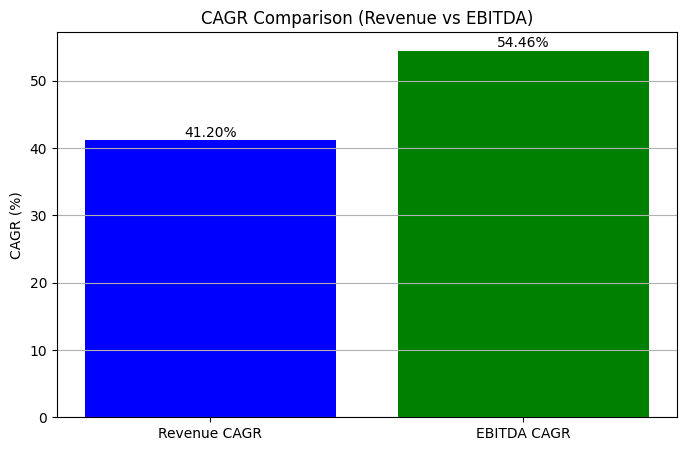

In [48]:
# Graph 2: CAGR Comparison (Revenue vs EBITDA)
categories = ["Revenue CAGR", "EBITDA CAGR"]
values = [revenue_cagr, ebitda_cagr]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=["blue", "green"])
plt.title("CAGR Comparison (Revenue vs EBITDA)")
plt.ylabel("CAGR (%)")
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha="center")
plt.grid(axis="y")
plt.show()


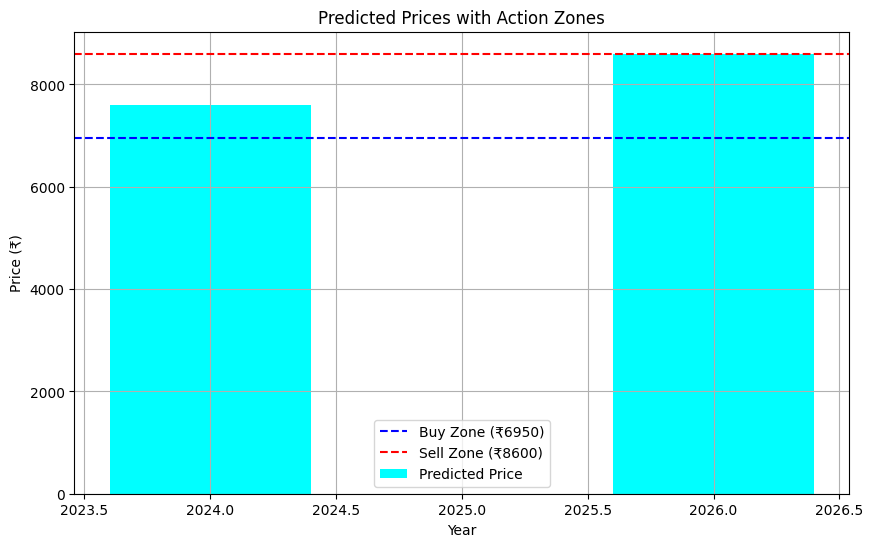

In [49]:
# Graph 4: Action Zones (Buy/Hold/Sell)
predicted_prices_with_years = {
    2024: 7600,  # Example predicted prices
    2026: 8600
}
actions = ["BUY", "HOLD", "SELL"]
zones = [6950, 8600]

plt.figure(figsize=(10, 6))
plt.bar(list(predicted_prices_with_years.keys()), predicted_prices_with_years.values(), color="cyan", label="Predicted Price")
plt.axhline(zones[0], color="blue", linestyle="--", label="Buy Zone (₹6950)")
plt.axhline(zones[1], color="red", linestyle="--", label="Sell Zone (₹8600)")
plt.title("Predicted Prices with Action Zones")
plt.xlabel("Year")
plt.ylabel("Price (₹)")
plt.legend()
plt.grid()
plt.show()